In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import nltk
import re 
import matplotlib.pyplot as plt


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Lots of cancellations and d...
1,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
2,✅ Trip Verified | Not only my first flight in...
3,✅ Trip Verified | My husband and myself were ...
4,✅ Trip Verified | Organised boarding process. ...


In [7]:
df

,reviews
0,Lots of cancellations and delays and no one ...
1,BA 242 on the 6/2/23. Boarding was delayed du...
2,"Not only my first flight in 17 years, but al..."
3,My husband and myself were flying to Madrid ...
4,Organised boarding process. Really friendly c...
...,...
995,London Heathrow to Vancouver. The 747 on thi...
996,Madrid to London. Credit where it's due. Flew...
997,Venice to Gatwick. I use Snokart luggage whic...
998,First 3 legs were trouble free. Lounges were ...


In [10]:
df.reviews= df.reviews.str.split('|',expand=True)

In [11]:
df

,reviews
0,Lots of cancellations and delays and no one ...
1,BA 242 on the 6/2/23. Boarding was delayed du...
2,"Not only my first flight in 17 years, but al..."
3,My husband and myself were flying to Madrid ...
4,Organised boarding process. Really friendly c...
...,...
995,London Heathrow to Vancouver. The 747 on thi...
996,Madrid to London. Credit where it's due. Flew...
997,Venice to Gatwick. I use Snokart luggage whic...
998,First 3 legs were trouble free. Lounges were ...


In [14]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...
1,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...
2,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...
3,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...
4,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...


In [15]:
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Vishaal
[nltk_data]     Grizzly\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Vishaal
[nltk_data]     Grizzly\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Vishaal
[nltk_data]     Grizzly\AppData\Roaming\nltk_data...


In [18]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Vishaal
[nltk_data]     Grizzly\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vishaal Grizzly\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...,"[(Lots, n), (cancellations, n), (delays, n), (..."
1,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a..."
2,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...,"[(first, a), (flight, n), (years, n), (also, r..."
3,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...,"[(husband, n), (flying, v), (Madrid, n), (rd, ..."
4,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...,"[(Organised, v), (boarding, v), (process, n), ..."


In [19]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...,"[(Lots, n), (cancellations, n), (delays, n), (...",Lots cancellation delay one apologize Edinbu...
1,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a...",BA Boarding delay due late arrival incoming ...
2,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...,"[(first, a), (flight, n), (years, n), (also, r...",first flight year also first time back Engla...
3,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...,"[(husband, n), (flying, v), (Madrid, n), (rd, ...",husband fly Madrid rd February Legal matter ...
4,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...,"[(Organised, v), (boarding, v), (process, n), ...",Organised board process Really friendly crew...


In [20]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Lots of cancellations and delays and no one ...,Lots cancellation delay one apologize Edinbu...
1,BA 242 on the 6/2/23. Boarding was delayed du...,BA Boarding delay due late arrival incoming ...
2,"Not only my first flight in 17 years, but al...",first flight year also first time back Engla...
3,My husband and myself were flying to Madrid ...,husband fly Madrid rd February Legal matter ...
4,Organised boarding process. Really friendly c...,Organised board process Really friendly crew...
...,...,...
995,London Heathrow to Vancouver. The 747 on thi...,London Heathrow Vancouver route old worn air...
996,Madrid to London. Credit where it's due. Flew...,Madrid London Credit due Flew club Europe cr...
997,Venice to Gatwick. I use Snokart luggage whic...,Venice Gatwick use Snokart luggage design zi...
998,First 3 legs were trouble free. Lounges were ...,First leg trouble free Lounges good staff go...


In [21]:
!pip install vaderSentiment

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...,"[(Lots, n), (cancellations, n), (delays, n), (...",Lots cancellation delay one apologize Edinbu...,-0.4215,Negative
1,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a...",BA Boarding delay due late arrival incoming ...,0.9493,Positive
2,"Not only my first flight in 17 years, but al...",Not only my first flight in years but also my...,"[(first, a), (flight, n), (years, n), (also, r...",first flight year also first time back Engla...,0.9869,Positive
3,My husband and myself were flying to Madrid ...,My husband and myself were flying to Madrid o...,"[(husband, n), (flying, v), (Madrid, n), (rd, ...",husband fly Madrid rd February Legal matter ...,0.9799,Positive
4,Organised boarding process. Really friendly c...,Organised boarding process Really friendly cr...,"[(Organised, v), (boarding, v), (process, n), ...",Organised board process Really friendly crew...,0.9371,Positive


In [23]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    537
Negative    353
Neutral     110
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1ce150f5f10>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'Positive'),
  Text(-0.25006438374722234, -1.071199236361342, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(-0.06958640777812825, 0.5959511153211613, '53.7%'),
  Text(-0.13639875477121216, -0.584290492560732, '35.3%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

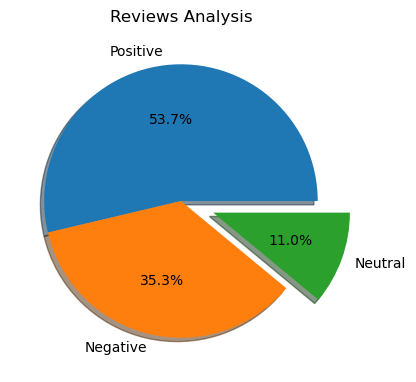

In [30]:
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=True)

In [27]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


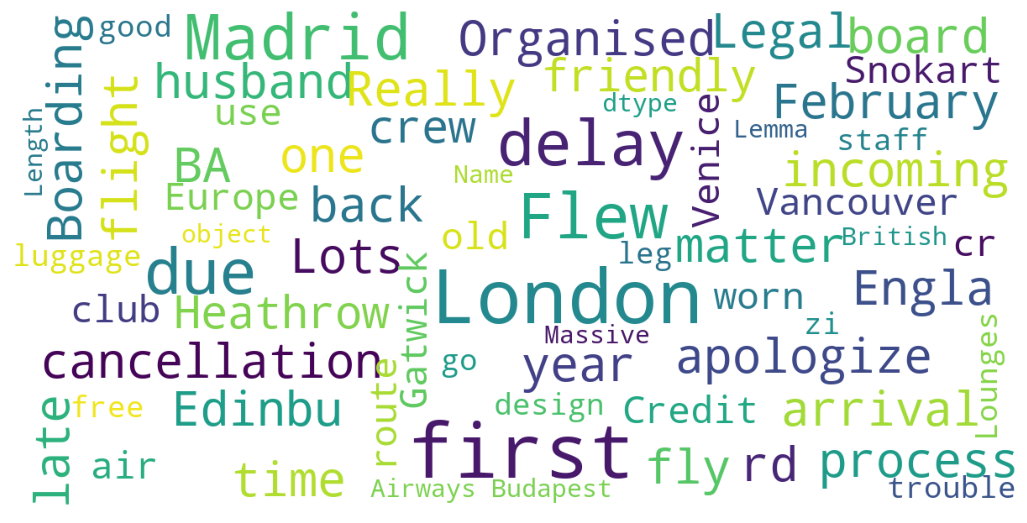

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(13, 14))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
